In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/Users/admin/Downloads/diabetes.csv')
df=data.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Columns Description

Pregnancies :Number of times pregnant

Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure :Diastolic blood pressure (mm Hg)

SkinThickness : Triceps skin fold thickness (mm)

Insulin : 2-Hour serum insulin (mu U/ml)

BMI : Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age : Age (years)

Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0




In [4]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram



In [6]:
for col in df.columns:
    print("The minimum value fore the columns {} is {}".format(col, df[col].min()))

The minimum value fore the columns Pregnancies is 0
The minimum value fore the columns Glucose is 0
The minimum value fore the columns BloodPressure is 0
The minimum value fore the columns SkinThickness is 0
The minimum value fore the columns Insulin is 0
The minimum value fore the columns BMI is 0.0
The minimum value fore the columns DiabetesPedigreeFunction is 0.078
The minimum value fore the columns Age is 21
The minimum value fore the columns Outcome is 0


* There are some error's in the data. For instance, it's imposible to have "0" value's in Bloodpressure of a living being, this error can laso be seen in other varibales such as Glucose,Insulin,BMI and Skin Thickness.

In [7]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.nan)

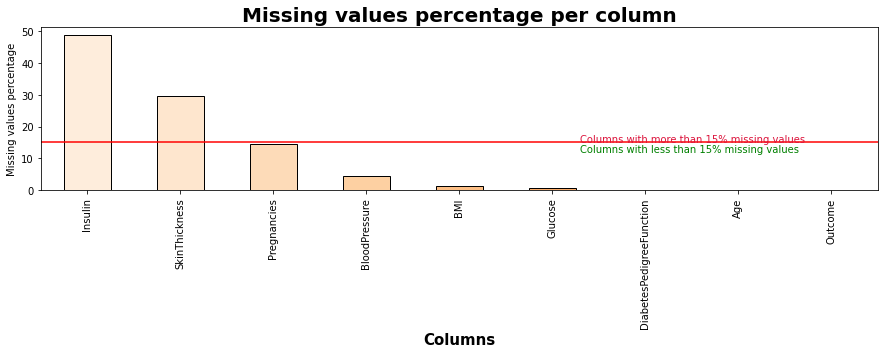

In [8]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=10, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=10, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    
    return plt.show()
msv_1(df, 15, color=sns.color_palette('Oranges',15))

In [9]:
df['Insulin']=df['Insulin'].fillna(df['Insulin'].median())

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    df[col]=df[col].fillna(df[col].mean())
    
df.isnull().sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
data=pd.read_csv('/Users/admin/Downloads/diabetes.csv')
df=data.copy()

In [11]:
for col in df.columns:
    print('The minimum value of col {} is {}' .format(col,(df[col]).min())) 

The minimum value of col Pregnancies is 0
The minimum value of col Glucose is 0
The minimum value of col BloodPressure is 0
The minimum value of col SkinThickness is 0
The minimum value of col Insulin is 0
The minimum value of col BMI is 0.0
The minimum value of col DiabetesPedigreeFunction is 0.078
The minimum value of col Age is 21
The minimum value of col Outcome is 0


In [12]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

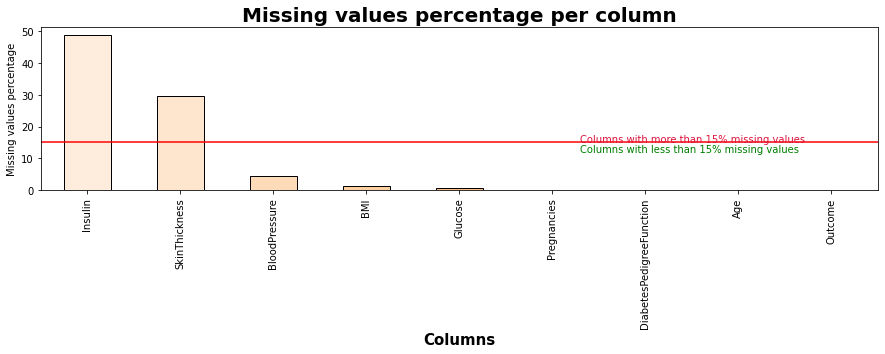

In [13]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=10, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=10, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    
    return plt.show()
msv_1(df, 15, color=sns.color_palette('Oranges',15))

In [14]:
df['Insulin']=df['Insulin'].fillna(df['Insulin'].median())

for col in ['Glucose','BloodPressure','SkinThickness','BMI']:
    df[col]=df[col].fillna(df[col].mean())
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

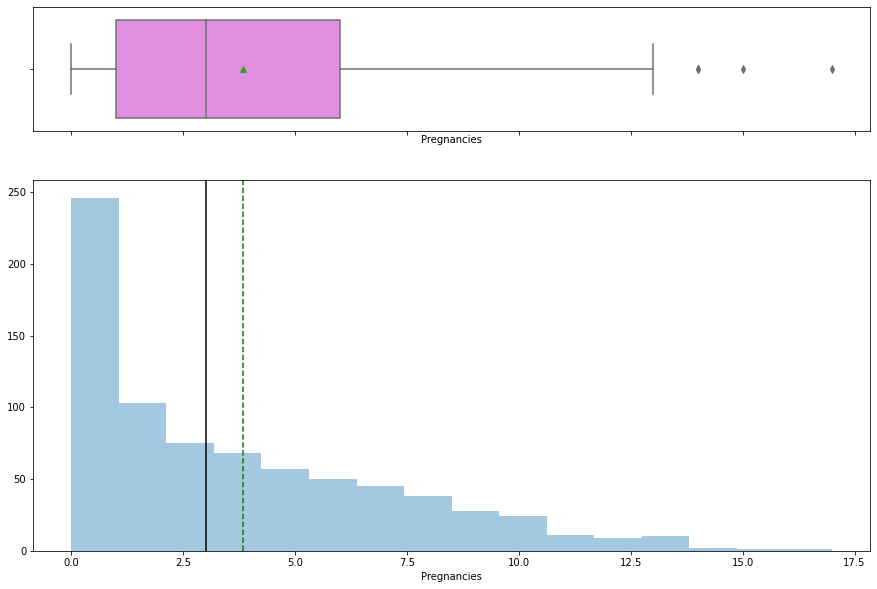

In [15]:
histogram_boxplot(df['Pregnancies'])

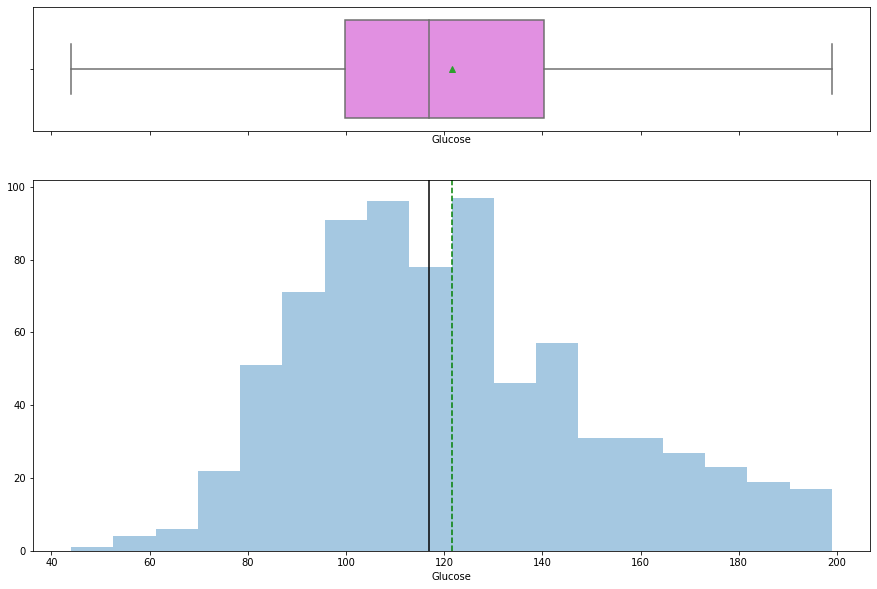

In [16]:
histogram_boxplot(df["Glucose"])

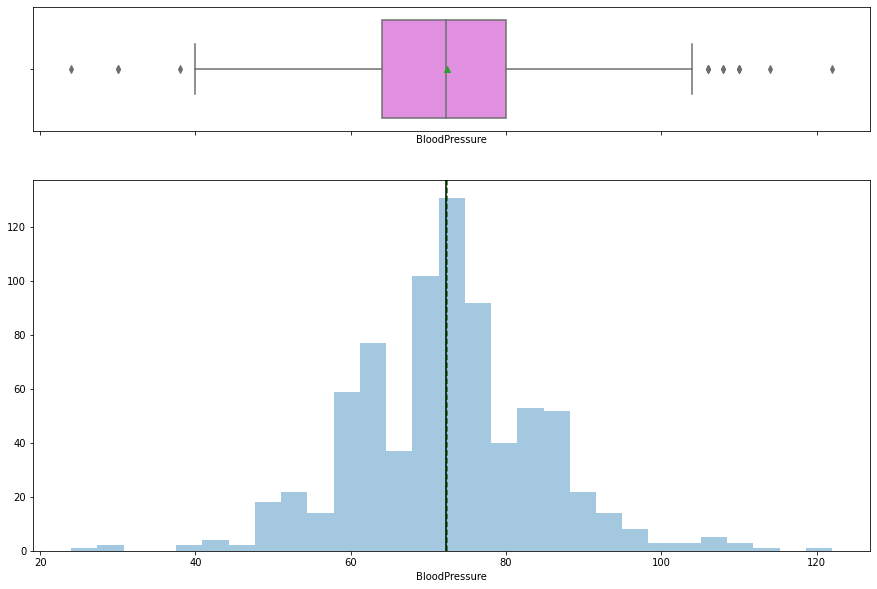

In [17]:
histogram_boxplot(df["BloodPressure"])

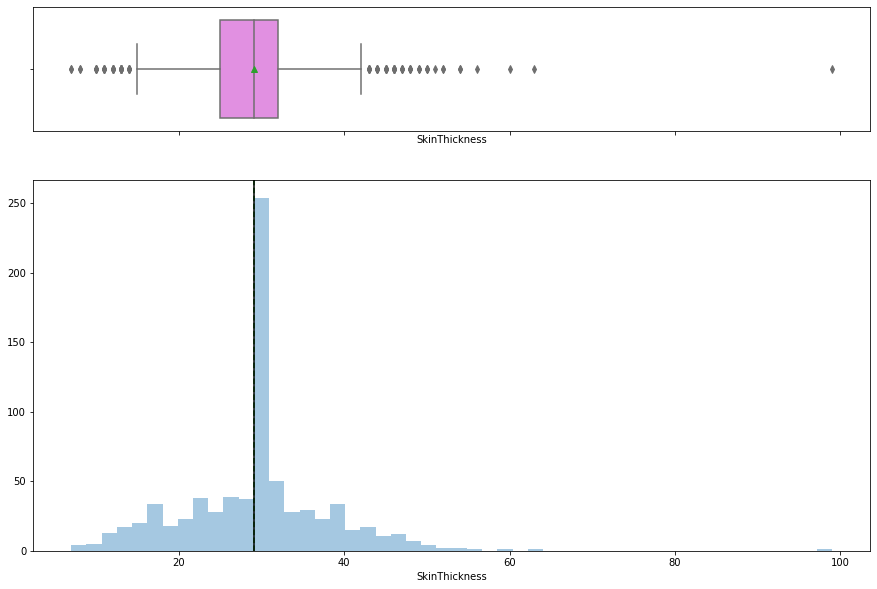

In [18]:
histogram_boxplot(df["SkinThickness"])

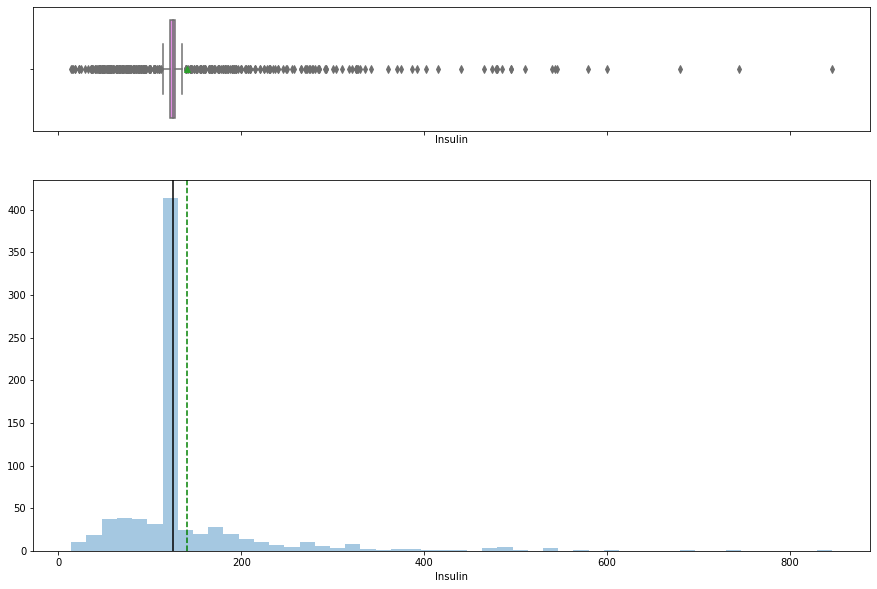

In [19]:
histogram_boxplot(df["Insulin"])

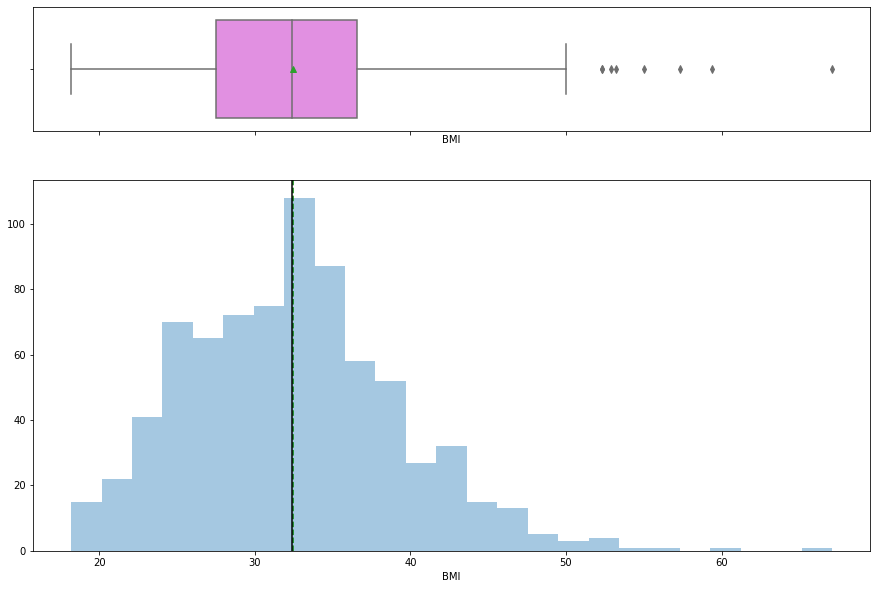

In [20]:
histogram_boxplot(df['BMI'])

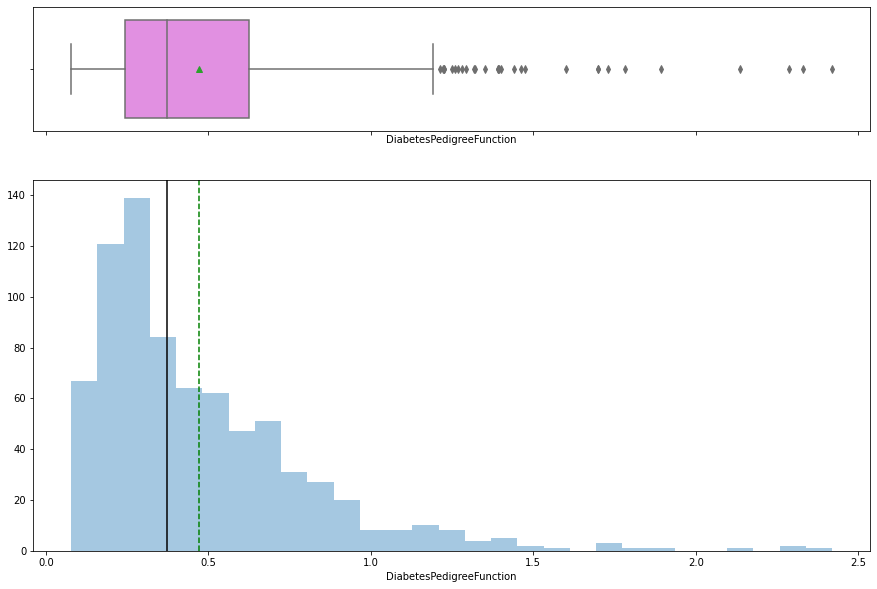

In [21]:
histogram_boxplot(df["DiabetesPedigreeFunction"])

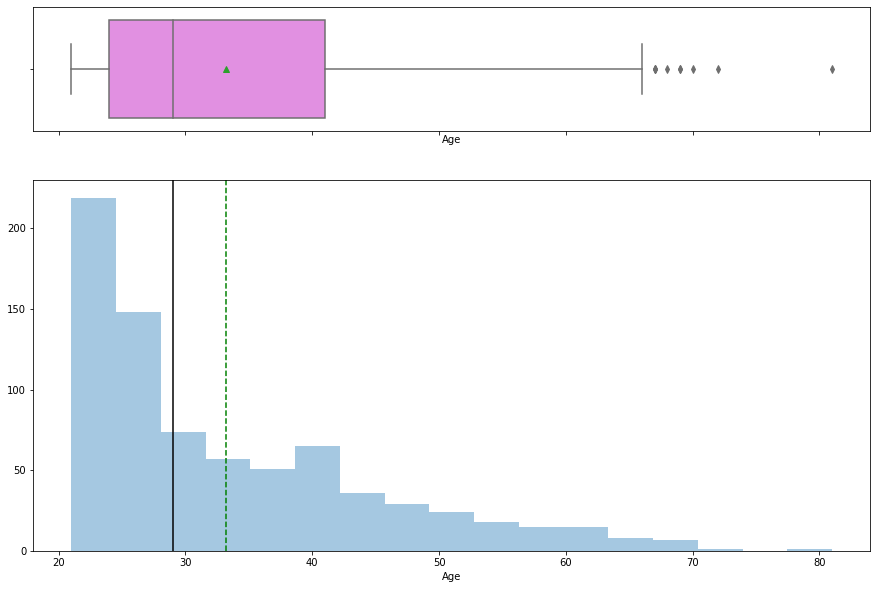

In [22]:
histogram_boxplot(df["Age"])

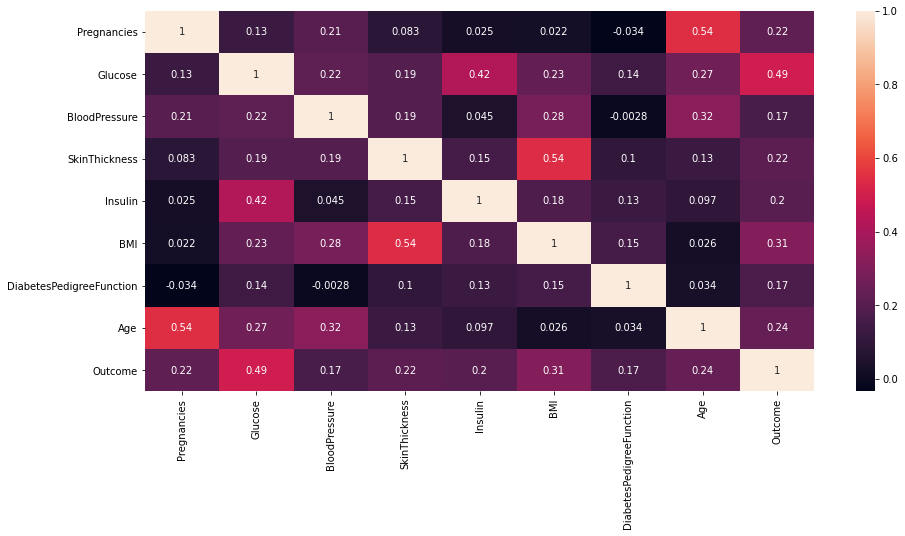

In [23]:
plt.figure(figsize=(15,7
                   ))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Observation

* There's a strong correlation between Age and Pregnancies.
* Close relationship with Glucose and Target (outcome).
* Also, insulin level and Glucose relationship should be investigated.
* BMI and SkinThickness have good relationship.

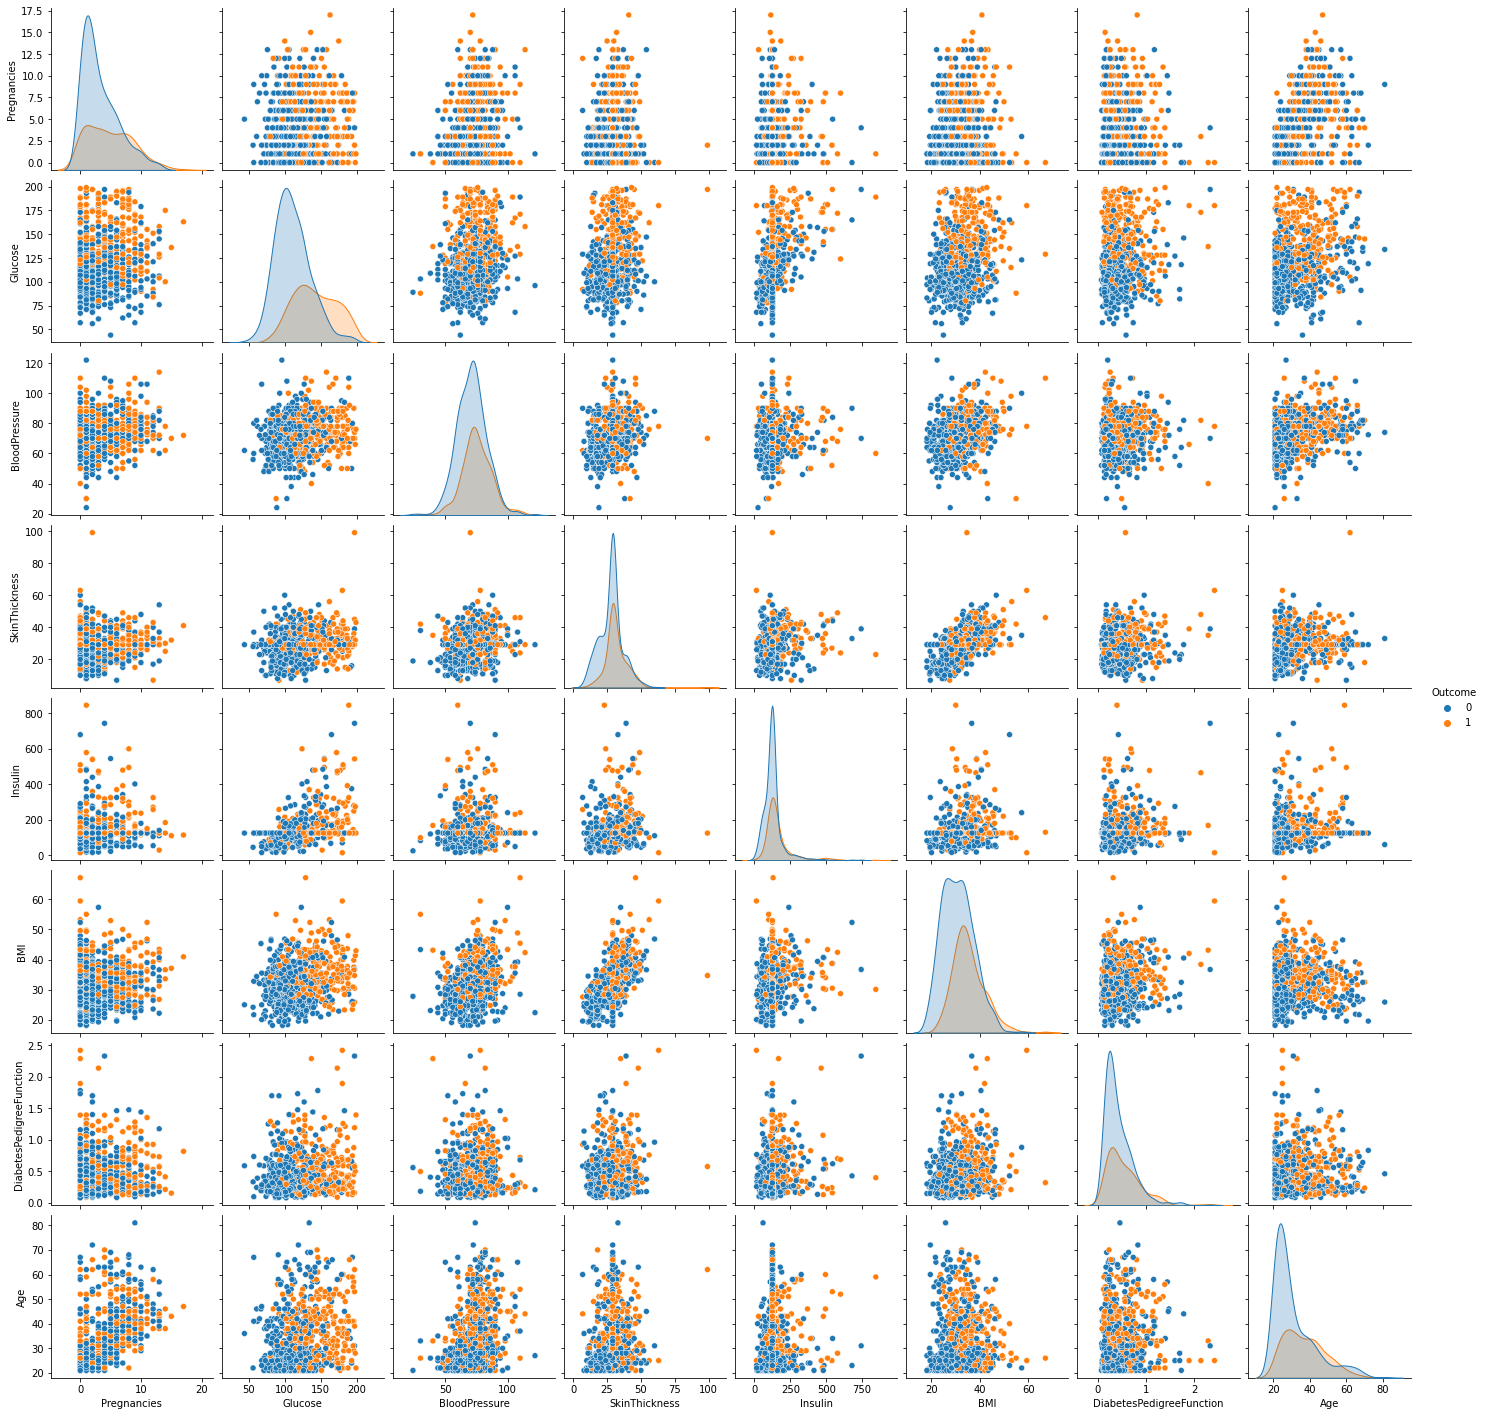

In [24]:
sns.pairplot(df,hue='Outcome')
plt.show()

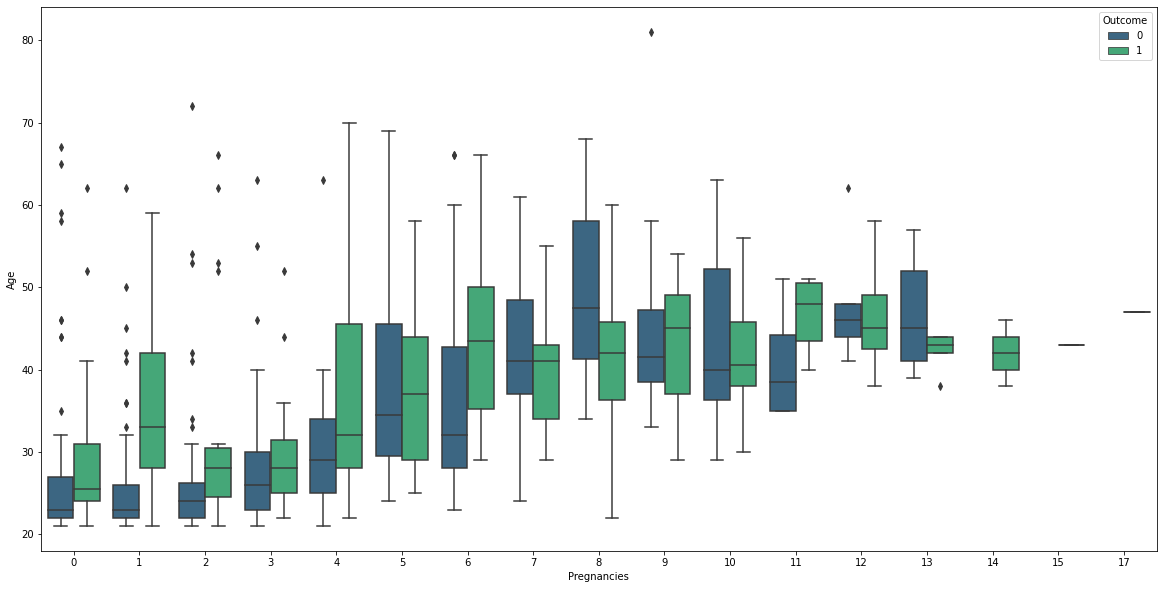

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(df["Pregnancies"], df["Age"], data=df , hue="Outcome" , palette="viridis")
plt.show()


## Age vs Pregnancies vs Outcome
### Observation
* Women in advanced maternal age (35-40yrs) with multiple pregnancies between are liable to be diabetic, most develop         gestational diabetes in their third trimester but disappear after child birth,however, develop type-2 diabetes later   in life. It's worth noting that in older women pancrease gets insensitive as they grow,also coupled with other health     risk factors like obesity, smoking are more susceptible to be diabetic than younger women.

* Women that experience first pregnacy within Age 27-41 yrs perhaps with other underlying health issues such as pre-     eclampsia,obesity etc not mentioned in the data are highly susceptible to the disease if not managed                   properly.




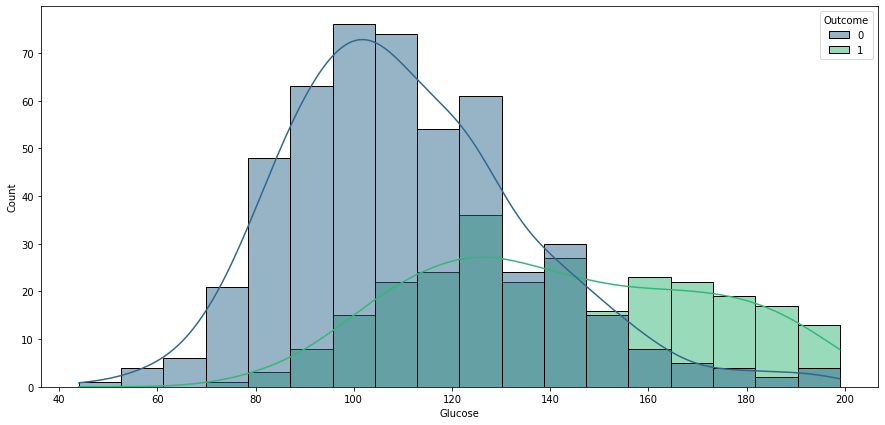

In [26]:
plt.figure(figsize=(15,7))
sns.histplot(x='Glucose', hue='Outcome',data=df,kde=True, palette="viridis")
plt.show()


## Glucose 2 Hours Tolerance Test vs Outcome 
### Observations
* Glucose level from between 100 and 140 (mg/dl) Normal, 141- 199 (mg/dl) prediabetic, > 200 mg/dl are diabetic.




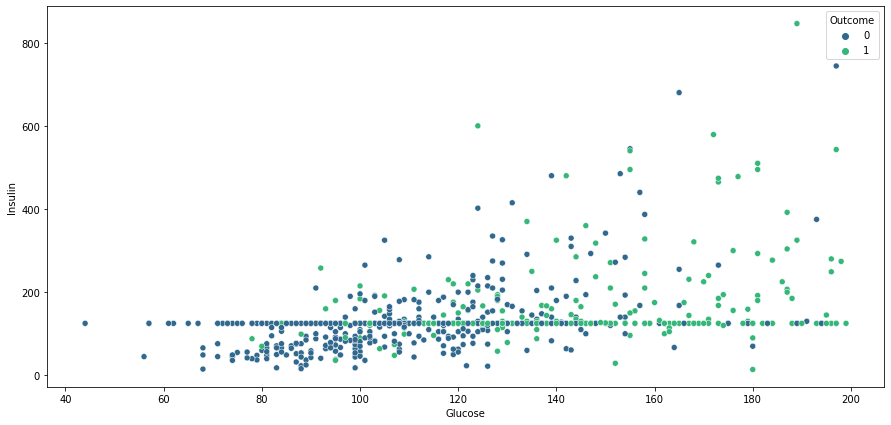

In [27]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Glucose', y="Insulin", data=df,hue="Outcome", palette="viridis")
plt.show()

In [28]:
from scipy.stats import skew
for col in df.drop("Outcome",axis=1).columns:
    print('The skewness for col {} is {}'.format(col, df[col].skew()))

The skewness for col Pregnancies is 0.9016739791518588
The skewness for col Glucose is 0.5327186599872982
The skewness for col BloodPressure is 0.13730536744146796
The skewness for col SkinThickness is 0.8221731383793047
The skewness for col Insulin is 3.380019128212173
The skewness for col BMI is 0.5982526551146302
The skewness for col DiabetesPedigreeFunction is 1.919911066307204
The skewness for col Age is 1.1295967011444805


In [29]:
>>> from scipy import stats

>>> list_cols = ['DiabetesPedigreeFunction','Insulin']
>>> df[list_cols] = np.where(np.abs(stats.zscore(df[list_cols])) >= 3, df[list_cols].median(), df[list_cols])     

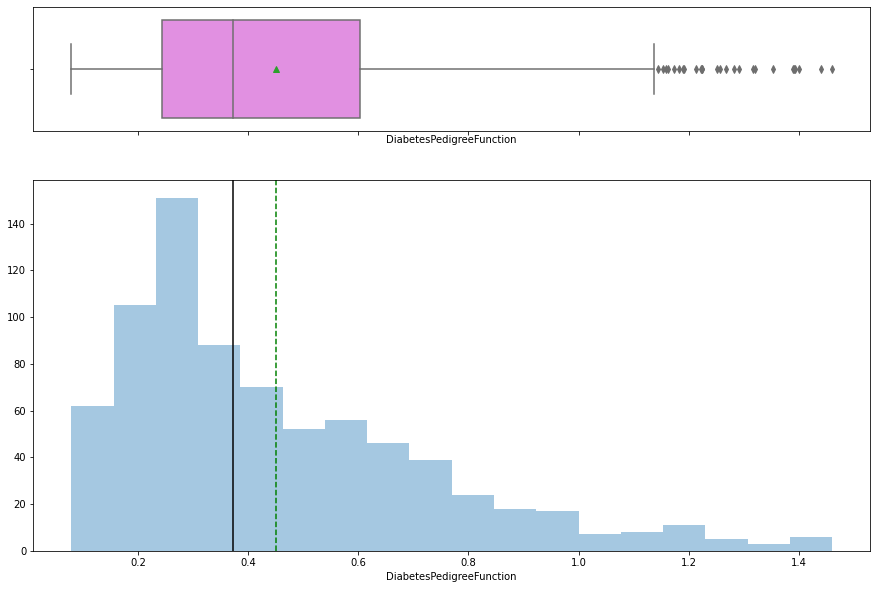

In [31]:
histogram_boxplot(df["DiabetesPedigreeFunction"])

# PREDICTIONS

## Dataset Splitting and Features Scaling

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =  pd.DataFrame(sc.fit_transform(X_train),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test = pd.DataFrame(sc.fit_transform(X_test),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

* Feature scaling is important so that the algorithm don't weigh values with higher numbers as bigger and weigh lower values small.


In [34]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc

## SUPORT VECTOR MACHINE

In [35]:
from sklearn.svm import SVC

model=SVC(kernel='rbf')                                 
model.fit(X_train,y_train)

SVC()

In [71]:
svm_score=model.score(X_test,y_test)*100
svm_score

74.47916666666666

In [58]:
y_pred=model.predict(X_test)
svc_score=accuracy_score(y_test,y_pred)*100
svc_score

74.47916666666666

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       125
           1       0.67      0.52      0.59        67

    accuracy                           0.74       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.74      0.74      0.74       192



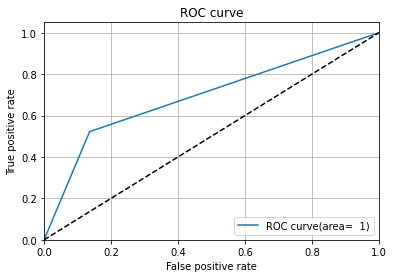

In [37]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
Y_pred=classifier.predict(X_test)
RFC_score=accuracy_score(y_test,Y_pred)*100
RFC_score

73.95833333333334

In [ ]:
print(classification_report(y_test,Y_pred))

In [ ]:
fpr,tpr,_=roc_curve(y_test,Y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
#print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## KNN Model

In [56]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3) 
clf.fit(X_train,y_train)  
KNN_score=clf.score(X_test,y_test)*100
KNN_score

73.4375

In [41]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       125
           1       0.65      0.52      0.58        67

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.69       192
weighted avg       0.73      0.73      0.73       192



## GRADIENTBOOSTING MODEL

In [42]:
from sklearn.ensemble import GradientBoostingClassifier



In [43]:
gb = GradientBoostingClassifier()

#fiting the model
gb.fit(X_train, y_train)

#prediction
y_pred = gb.predict(X_test)

#Accuracy
GB_score= (gb.score(X_test, y_test)*100)
GB_score


75.52083333333334

In [45]:
def print_performance(yt,clf):
    y_pred=clf.predict(X_test)
    print('ROC_AUC value : ',roc_auc_score(yt,y_pred),'\n')
    print('classification_report : ','\n',classification_report(yt,y_pred))
    print('Confusion_matrics : ','\n',confusion_matrix(yt,y_pred))

In [47]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score


In [73]:
classifier = RandomForestClassifier(n_estimators=250,random_state=15)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print_performance(y_test,classifier)
RF_score=classifier.score(X_test,y_test)*100
RF_score

ROC_AUC value :  0.6731940298507463 

classification_report :  
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       125
           1       0.61      0.52      0.56        67

    accuracy                           0.72       192
   macro avg       0.69      0.67      0.68       192
weighted avg       0.71      0.72      0.71       192

Confusion_matrics :  
 [[103  22]
 [ 32  35]]


71.875

In [68]:
from sklearn.linear_model import LogisticRegression


In [64]:
classifier=LogisticRegression(random_state=42)
classifier.fit(X_train,y_train)
print_performance(y_test,classifier)
Log_Score=classifier.score(X_test,y_test)*100
Log_Score

ROC_AUC value :  0.6961194029850747 

classification_report :  
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       125
           1       0.65      0.55      0.60        67

    accuracy                           0.74       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.74      0.73       192

Confusion_matrics :  
 [[105  20]
 [ 30  37]]


73.95833333333334

                        Model      Score
3  GradientBoostingClassifier  75.520833
0                         SVC  74.479167
1      RandomForestClassifier  73.958333
4          LogisticRegression  73.958333
2        KNeighborsClassifier  73.437500


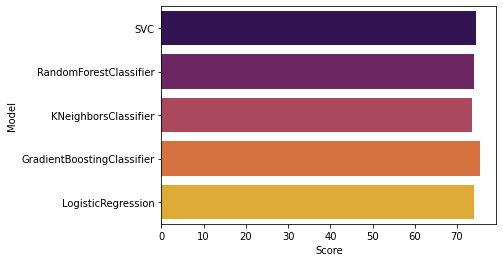

In [65]:
models = ['SVC', 'RandomForestClassifier' , 'KNeighborsClassifier', 
          'GradientBoostingClassifier', 'LogisticRegression']
scores = [svc_score, RFC_score ,KNN_score, GB_score, Log_Score]
score_table = pd.DataFrame({'Model':models, 'Score':scores})
score_table.sort_values(by='Score', axis=0, ascending=False)
print(score_table.sort_values(by='Score', ascending=False))
sns.barplot(x = score_table['Score'], y = score_table['Model'], palette='inferno');